In [37]:
# 导入数据
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline
file = r'data_set/SalePrice.csv'
df = pd.read_csv(file)

In [38]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [39]:
# 描述性统计
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

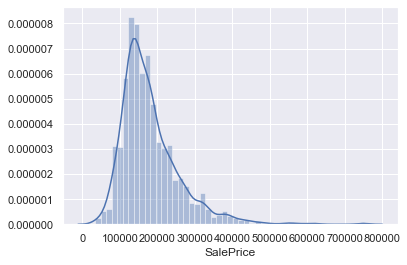

In [40]:
# 绘制#histogram直方图
sns.distplot(df['SalePrice'])

In [41]:
# 计算偏度和峰度
print("Skewness:%f" % df['SalePrice'].skew())
print("Kurtosis:%f" % df['SalePrice'].kurt())

Skewness:1.882876
Kurtosis:6.536282


Text(0, 0.5, 'SalePrice')

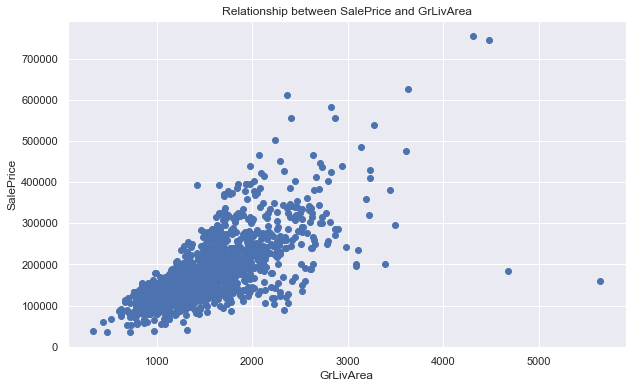

In [42]:
# 检查数据间的关联关系
# 地上部分面积与房价
var = df['GrLivArea']
plt.figure(figsize=(10, 6))
plt.scatter(var, df['SalePrice'])
plt.title('Relationship between SalePrice and GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

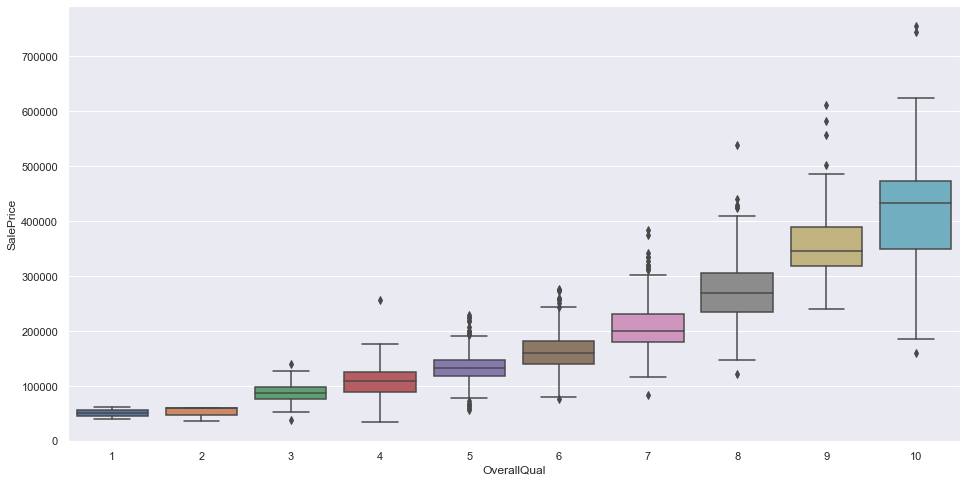

In [43]:
# 房屋质量评价与房价
var = df['OverallQual']
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x=var, y=df['SalePrice'])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

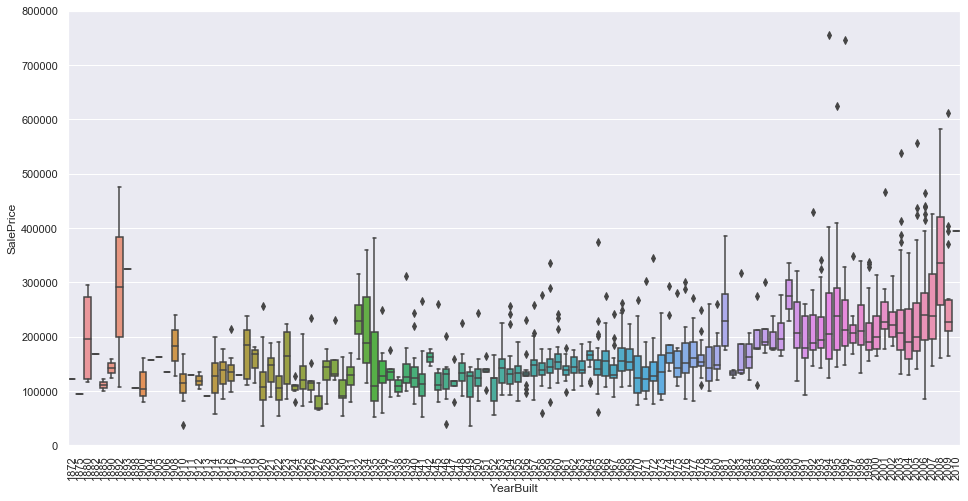

In [44]:
# 建造年份与房价
var = df['YearBuilt']
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(var, df['SalePrice'])
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

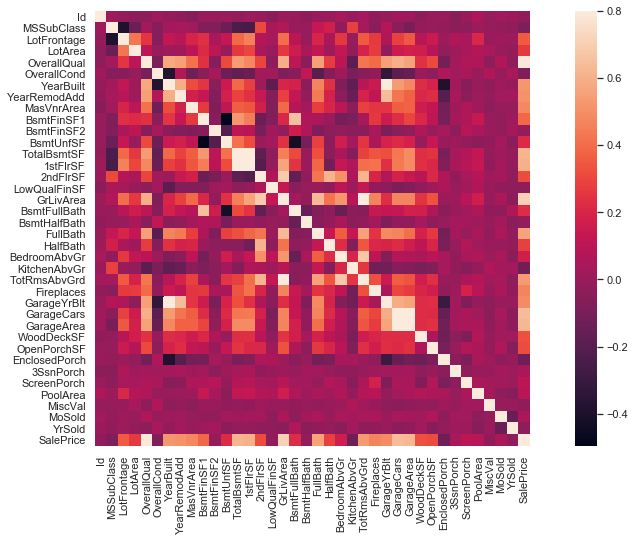

In [45]:
# 相关性分析，相关性矩阵（以热力图的形式呈现）
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(corrmat, vmax=0.8, square=True)

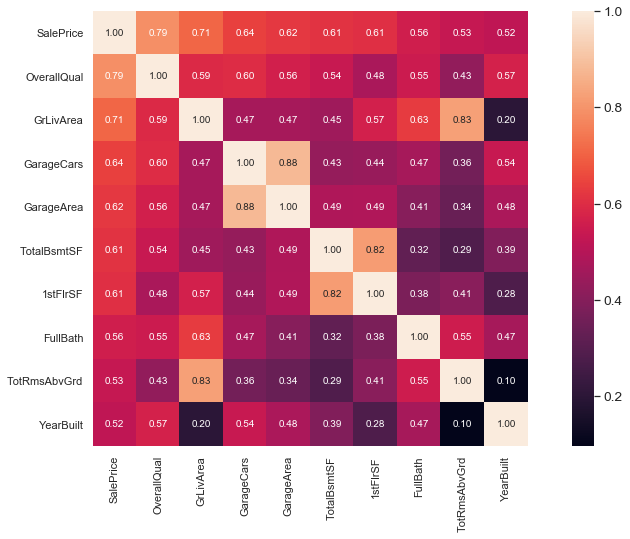

In [46]:
# 房屋售价相关的变量矩阵
k = 10  # 用于热力图的变量数量
f, ax = plt.subplots(figsize=(16, 8))
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

D:\Programing\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


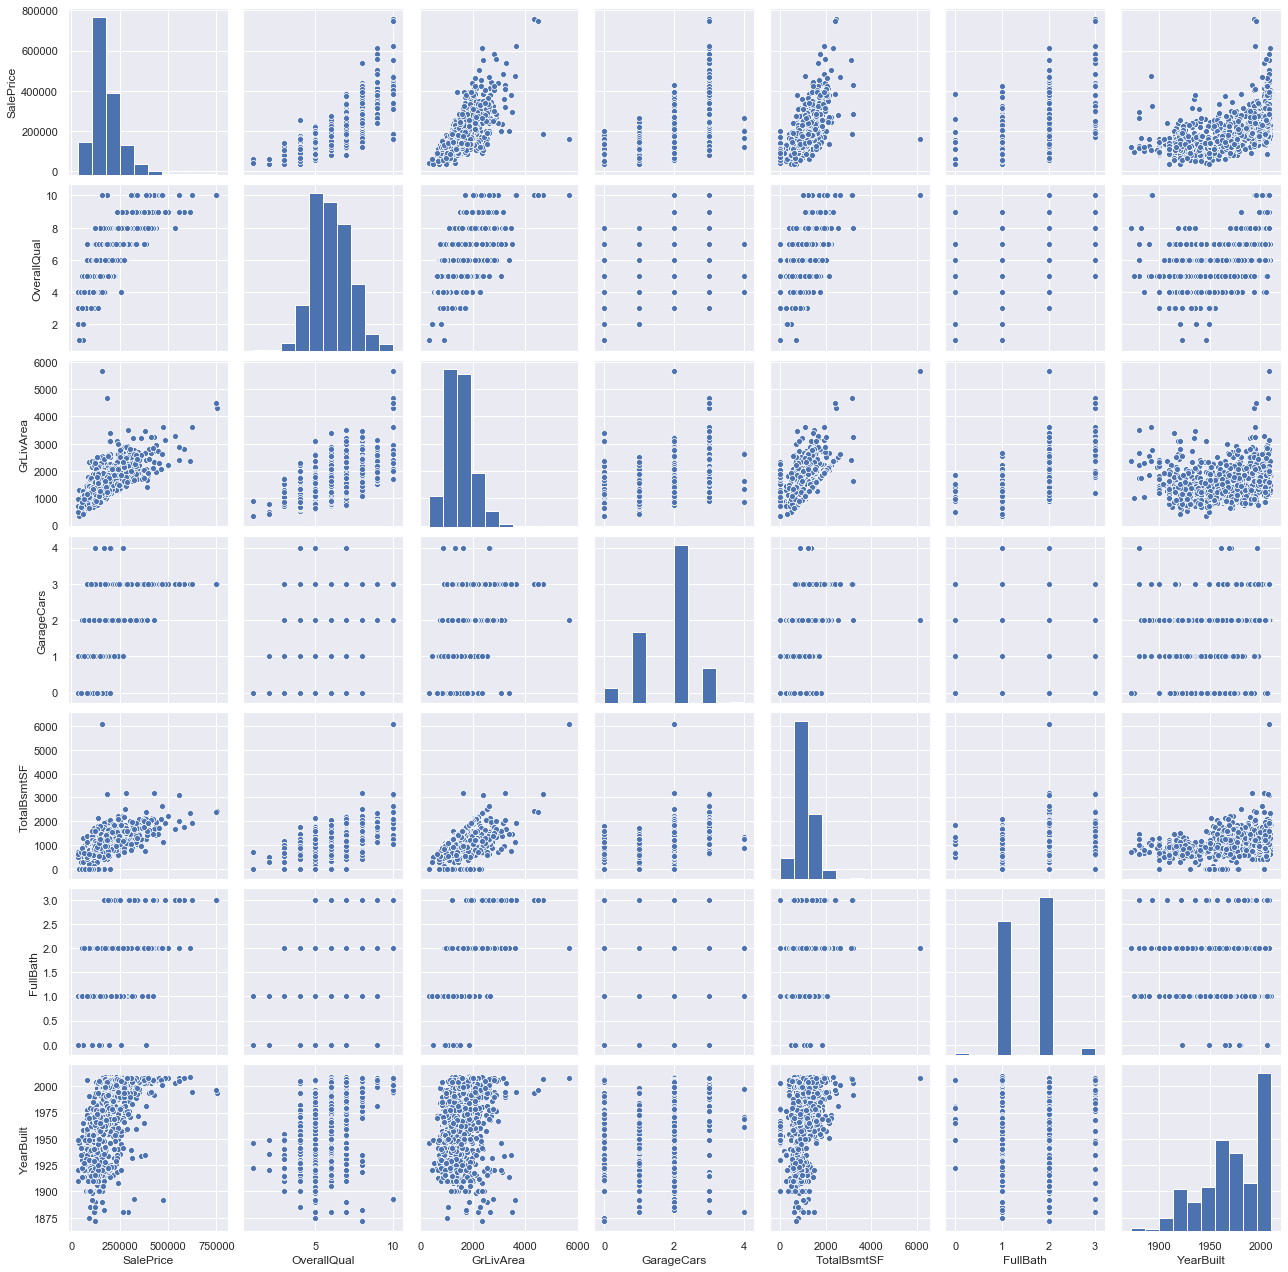

In [47]:
# 分析彼此之间关联性最强的变量（散点图）
sns.set()
cols = [
    'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    'FullBath', 'YearBuilt'
]
sns.pairplot(df[cols], size=2.5)
plt.show()

In [48]:
# 缺失值处理
# 首先统计各列缺失值情况：
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [49]:
# 舍弃缺失值
df = df.drop((missing_data[missing_data['Total'] > 1]).index, 1)  # 按条件弃用多列
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max()  # 再次检查是否还有缺失值

# 如果缺失值很重要，那么可以使用下面的代码来完成自动填充，这里填充的结果会是平均值。
# from sklearn.impute import SimpleImputer
# my_imputer = SimpleImputer()
# data_with_imputed_values = my_imputer.fit_transform(original_data)

0

In [50]:
# 异常值判断：归一化处理
saleprice_scaled = StandardScaler().fit_transform(df['SalePrice'][:,
                                                                  np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


Text(0, 0.5, 'SalePrice')

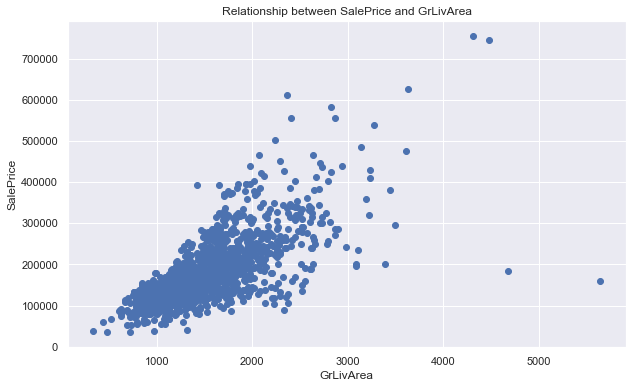

In [51]:
# 我们可以考虑删除这些点
# 另外，我们也可以通过变量关系的散点图，判断哪些属于异常点
var = df['GrLivArea']
plt.figure(figsize=(10, 6))
plt.scatter(var, df['SalePrice'])
plt.title('Relationship between SalePrice and GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

In [52]:
# 我们删除右侧的两个点
df.sort_values(by='GrLivArea', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [53]:
df = df.drop(df[df['Id'] == 1299].index)
df = df.drop(df[df['Id'] == 523].index)

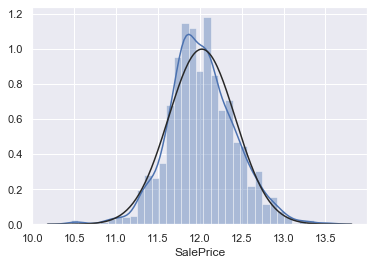

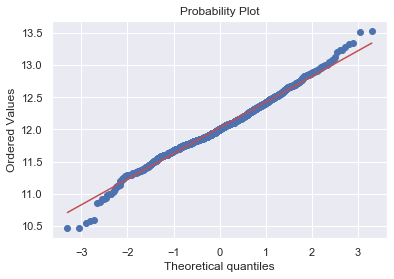

In [54]:
# 非正态数据,对数化处理
df['SalePrice'] = np.log(df['SalePrice'])
# 直方图和正态分布检查
sns.distplot(df['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)